In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('/content/gdrive/MyDrive/Movie Reviews/IMDB Dataset.csv')
df.head(10)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive

In [4]:
df['type'] = df['sentiment'].replace( {'positive': 1, 'negative': 0} ).astype(int)
df.head(5)

review sentiment  type
0  One of the other reviewers has mentioned that ...  positive     1
1  A wonderful little production. <br /><br />The...  positive     1
2  I thought this was a wonderful way to spend ti...  positive     1
3  Basically there's a family where a little boy ...  negative     0
4  Petter Mattei's "Love in the Time of Money" is...  positive     1

In [5]:
print("COLUMS IN THE GIVEN DATA:")
for col in df.columns:
  print(col)

COLUMS IN THE GIVEN DATA:
review
sentiment
type


In [6]:
df.shape

(50000, 3)

# Text cleaning

In [7]:
import re

In [8]:
#Removing the html strips
TAG_RE = re.compile(r'<[^>]+>')
def strip_html(text):
    return TAG_RE.sub('', text)

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)
df['review'][1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [9]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    text=re.sub('[^a-zA-Z]',' ',text)
    return text
#Apply function on review column
df['review']=df['review'].apply(remove_special_characters)
df['review'][1]

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

In [10]:
df['review']=df['review'].str.lower()

In [11]:
df['review'][1]

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

# Tokenisation


In [12]:
def tokenizer(review):
  return review.split()

In [13]:
df['review']=df['review'].apply(tokenizer)

In [14]:
df['review'][1]

['a',
 'wonderful',
 'little',
 'production',
 'the',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming',
 'very',
 'old',
 'time',
 'bbc',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 'and',
 'sometimes',
 'discomforting',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 'the',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'only',
 'has',
 'got',
 'all',
 'the',
 'polari',
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 'you',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'williams',
 'diary',
 'entries',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 'a',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',
 's',
 'of',
 'comedy',
 'and',
 'his',
 'life',
 'the',
 'realism',
 'really',
 'co

# Stemming

In [15]:
import nltk
from nltk.stem import PorterStemmer

def stem_it(review):
  porter = nltk.PorterStemmer()
  new_words = [porter.stem(w) for w in review]
  return new_words

In [16]:
df['review']=df['review'].apply(stem_it)

In [17]:
df['review'][1]

['a',
 'wonder',
 'littl',
 'product',
 'the',
 'film',
 'techniqu',
 'is',
 'veri',
 'unassum',
 'veri',
 'old',
 'time',
 'bbc',
 'fashion',
 'and',
 'give',
 'a',
 'comfort',
 'and',
 'sometim',
 'discomfort',
 'sens',
 'of',
 'realism',
 'to',
 'the',
 'entir',
 'piec',
 'the',
 'actor',
 'are',
 'extrem',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'onli',
 'ha',
 'got',
 'all',
 'the',
 'polari',
 'but',
 'he',
 'ha',
 'all',
 'the',
 'voic',
 'down',
 'pat',
 'too',
 'you',
 'can',
 'truli',
 'see',
 'the',
 'seamless',
 'edit',
 'guid',
 'by',
 'the',
 'refer',
 'to',
 'william',
 'diari',
 'entri',
 'not',
 'onli',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watch',
 'but',
 'it',
 'is',
 'a',
 'terrificli',
 'written',
 'and',
 'perform',
 'piec',
 'a',
 'master',
 'product',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',
 's',
 'of',
 'comedi',
 'and',
 'hi',
 'life',
 'the',
 'realism',
 'realli',
 'come',
 'home',
 'with',
 'the',
 'littl',
 'thing',
 'the',
 

# Lemmatisation

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
def lemmit_it(review):
  return [lemmatizer.lemmatize(word) for word in review]

In [20]:
df['review']=df['review'].apply(lemmit_it)

In [21]:
df['review'][1]

['a',
 'wonder',
 'littl',
 'product',
 'the',
 'film',
 'techniqu',
 'is',
 'veri',
 'unassum',
 'veri',
 'old',
 'time',
 'bbc',
 'fashion',
 'and',
 'give',
 'a',
 'comfort',
 'and',
 'sometim',
 'discomfort',
 'sen',
 'of',
 'realism',
 'to',
 'the',
 'entir',
 'piec',
 'the',
 'actor',
 'are',
 'extrem',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'onli',
 'ha',
 'got',
 'all',
 'the',
 'polari',
 'but',
 'he',
 'ha',
 'all',
 'the',
 'voic',
 'down',
 'pat',
 'too',
 'you',
 'can',
 'truli',
 'see',
 'the',
 'seamless',
 'edit',
 'guid',
 'by',
 'the',
 'refer',
 'to',
 'william',
 'diari',
 'entri',
 'not',
 'onli',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watch',
 'but',
 'it',
 'is',
 'a',
 'terrificli',
 'written',
 'and',
 'perform',
 'piec',
 'a',
 'master',
 'product',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',
 's',
 'of',
 'comedi',
 'and',
 'hi',
 'life',
 'the',
 'realism',
 'realli',
 'come',
 'home',
 'with',
 'the',
 'littl',
 'thing',
 'the',
 '

# Stopword Removal

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
def stop_it(text):
  review = [word for word in text if not word in stop_words]
  return review

In [25]:
df['review']=df['review'].apply(stop_it)

In [26]:
df['review'][1]

['wonder',
 'littl',
 'product',
 'film',
 'techniqu',
 'veri',
 'unassum',
 'veri',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comfort',
 'sometim',
 'discomfort',
 'sen',
 'realism',
 'entir',
 'piec',
 'actor',
 'extrem',
 'well',
 'chosen',
 'michael',
 'sheen',
 'onli',
 'ha',
 'got',
 'polari',
 'ha',
 'voic',
 'pat',
 'truli',
 'see',
 'seamless',
 'edit',
 'guid',
 'refer',
 'william',
 'diari',
 'entri',
 'onli',
 'well',
 'worth',
 'watch',
 'terrificli',
 'written',
 'perform',
 'piec',
 'master',
 'product',
 'one',
 'great',
 'master',
 'comedi',
 'hi',
 'life',
 'realism',
 'realli',
 'come',
 'home',
 'littl',
 'thing',
 'fantasi',
 'guard',
 'rather',
 'use',
 'tradit',
 'dream',
 'techniqu',
 'remain',
 'solid',
 'disappear',
 'play',
 'knowledg',
 'sen',
 'particularli',
 'scene',
 'concern',
 'orton',
 'halliwel',
 'set',
 'particularli',
 'flat',
 'halliwel',
 'mural',
 'decor',
 'everi',
 'surfac',
 'terribl',
 'well',
 'done']

In [27]:
df.head(5)

review sentiment  type
0  [one, review, ha, mention, watch, oz, episod, ...  positive     1
1  [wonder, littl, product, film, techniqu, veri,...  positive     1
2  [thought, thi, wa, wonder, way, spend, time, h...  positive     1
3  [basic, famili, littl, boy, jake, think, zombi...  negative     0
4  [petter, mattei, love, time, money, visual, st...  positive     1

In [28]:
df['review']=df['review'].apply(" ".join)

In [29]:
df['review'][1]

'wonder littl product film techniqu veri unassum veri old time bbc fashion give comfort sometim discomfort sen realism entir piec actor extrem well chosen michael sheen onli ha got polari ha voic pat truli see seamless edit guid refer william diari entri onli well worth watch terrificli written perform piec master product one great master comedi hi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sen particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

In [30]:
df.head(5)

review sentiment  type
0  one review ha mention watch oz episod hook rig...  positive     1
1  wonder littl product film techniqu veri unassu...  positive     1
2  thought thi wa wonder way spend time hot summe...  positive     1
3  basic famili littl boy jake think zombi hi clo...  negative     0
4  petter mattei love time money visual stun film...  positive     1

# Transform Text Data into TDF /TF-IDF Vectors 

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
y=df.type.values
x=tfidf.fit_transform(df['review'])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25,shuffle=False)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37500, 70611)
(12500, 70611)
(37500,)
(12500,)


# Classification using Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_pred, y_test)*100
print("accuracy:",acc_log)

accuracy: 89.168


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Classification Report: \n', classification_report(y_test, y_pred, target_names = ['Negative', 'Positive']))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Accuracy score: \n', accuracy_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      6241
    Positive       0.89      0.90      0.89      6259

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500

Confusion Matrix: 
 [[5511  730]
 [ 624 5635]]
Accuracy score: 
 0.89168


In [36]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

# Classification using LinearSVC Accuracy

In [37]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(C=0.5,random_state=42)
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc =accuracy_score(y_pred, y_test) * 100
print("accuracy:",acc_linear_svc)

accuracy: 89.584


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Classification Report: \n', classification_report(y_test, y_pred, target_names = ['Negative', 'Positive']))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Accuracy score: \n', accuracy_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.90      0.89      0.90      6241
    Positive       0.89      0.90      0.90      6259

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500

Confusion Matrix: 
 [[5560  681]
 [ 621 5638]]
Accuracy score: 
 0.89584


In [39]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

<function matplotlib.pyplot.show>

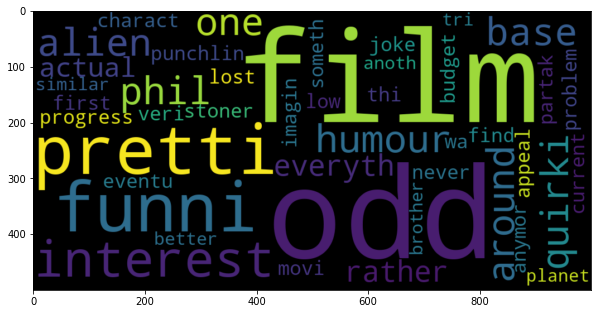

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(10,10))
positive_text= df['review'][10]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=2)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

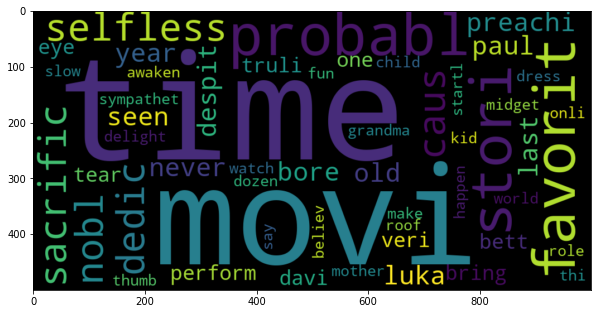

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(10,10))
negative_text=df['review'][5]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=1)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [42]:
def prediction(review):
  review = denoise_text(review)
  review = remove_special_characters(review)
  review = review.lower()
  review = tokenizer(review)
  review = stem_it(review)
  review = lemmit_it(review)
  review = stop_it(review)
  review = " ".join(review)
  vec = tfidf.transform([review])
  predict = linear_svc.predict(vec)
  return predict

In [50]:
review = "Amazing movie"
print(prediction(review))

[1]


In [44]:
import pickle

In [45]:
pickle.dump(linear_svc,open('model','wb'))